## Question 1

In [24]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
from scipy import stats

# Column Name
name1 = "AirTime"
name2 = "Distance"

# Reading CSV
df = pd.read_csv('2008.csv', usecols=[name1, name2])
df = df.dropna(subset=[name1, name2]) 

COLUMN: AirTime
25%ile: 55.0
75%ile: 132.0
IQR: 77.0
25%ile - 1.5*IQR: -60.5
75%ile + 1.5*IQR: 247.5

COLUMN: Distance
25%ile: 326.0
75%ile: 954.0
IQR: 628.0
25%ile - 1.5*IQR: -616.0
75%ile + 1.5*IQR: 1896.0


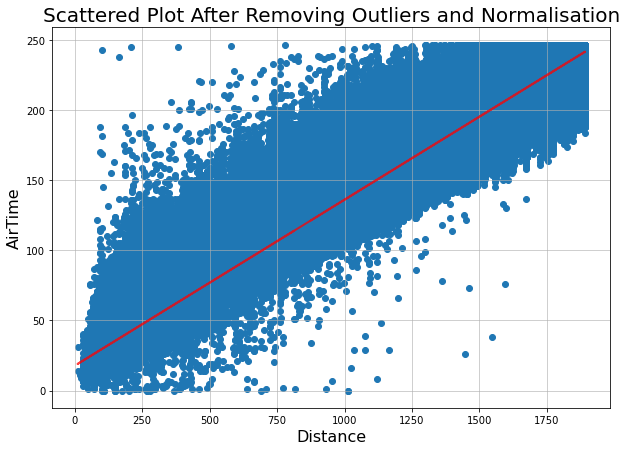

COLUMN: AirTime
Mean: 92.36460772858683
STD: 48.91669905626987

COLUMN: Distance
Mean: 629.9026030508991
STD: 402.54821663413406


In [25]:
# Dataframes
df1 = df[name1]
df2 = df[name2]

# Removing outliers based on IQR
q1 = df1.quantile(0.25)
q3 = df1.quantile(0.75)
iqr = q3 - q1 #stats.iqr(df1, interpolation = 'midpoint')
low_lim = q1 - 1.5 * iqr
up_lim = q3 + 1.5 * iqr
df = df[df[name1] <= up_lim]
df = df[df[name1] >= low_lim]
print('COLUMN: ' + name1)
print('25%ile: ' + str(q1))
print('75%ile: ' + str(q3))
print('IQR: ' + str(iqr))
print('25%ile - 1.5*IQR: ' + str(low_lim))
print('75%ile + 1.5*IQR: ' + str(up_lim))
print()

q1 = df2.quantile(0.25)
q3 = df2.quantile(0.75)
iqr = q3 - q1 #stats.iqr(df1, interpolation = 'midpoint')
low_lim = q1 - 1.5 * iqr
up_lim = q3 + 1.5 * iqr
df = df[df[name2] <= up_lim]
df = df[df[name2] >= low_lim]
print('COLUMN: ' + name2)
print('25%ile: ' + str(q1))
print('75%ile: ' + str(q3))
print('IQR: ' + str(iqr))
print('25%ile - 1.5*IQR: ' + str(low_lim))
print('75%ile + 1.5*IQR: ' + str(up_lim))

# New dataframes for individual analysis
df1 = df[name1]
df2 = df[name2]

# Normalise to STD Normal such that MEAN = 0, VAR(SD) = 1
#df1 = ( df1 - df1.mean() ) / df1.std()
#df2 = ( df2 - df2.mean() ) / df2.std()

plt.figure(figsize=(10, 7))
plt.scatter(df2, df1)
slope, intercept, r_value, p_value, std_err = stats.linregress(df2, df1)
x = df2
y = slope*df2 + intercept
plt.plot(x,y, 'r', alpha=0.75, linewidth = 2)
plt.title('Scattered Plot After Removing Outliers and Normalisation', fontsize=20)
plt.xlabel(name2, fontsize=16)
plt.ylabel(name1, fontsize=16)
plt.grid(alpha=0.75)
plt.show()

print('COLUMN: ' + name1)
print('Mean: '+str(df1.mean()))
print('STD: '+str(df1.std()))
print()
print('COLUMN: ' + name2)
print('Mean: '+str(df2.mean()))
print('STD: '+str(df2.std()))

In [26]:
err = pow(df1-y,2)
rmse = math.sqrt((err.to_frame()).sum()/len(err))
print("RMSE: " + str(rmse))

RMSE: 10.724236433910562


## Question 2